In [1]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random 
import tensorflow as tf
import cv2

In [2]:
img_database = np.loadtxt("D:/DATASET/fashion-mnist_train _1.csv",delimiter=',',skiprows=1)
print(img_database.shape)

total_num_images = (img_database.shape[0])  

(60000, 784)


In [3]:
n_input = 784
hidden_layer_1 = 256
hidden_layer_2 = 32
hidden_layer_3 = 32
hidden_layer_4 = 256
output_layer = 784



In [4]:
learning_rate = 0.1
epochs =10
batch_size = 100

In [5]:
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder(tf.float32,[None,n_input])
y = tf.compat.v1.placeholder(tf.float32,[None,output_layer])


In [6]:
z1 = tf.compat.v1.layers.dense(x,hidden_layer_1,activation = tf.nn.sigmoid)
z2 = tf.compat.v1.layers.dense(z1,hidden_layer_2,activation = tf.nn.sigmoid)
z3 = tf.compat.v1.layers.dense(z2,hidden_layer_3,activation = tf.nn.sigmoid)
z4 = tf.compat.v1.layers.dense(z3,hidden_layer_4,activation = tf.nn.sigmoid)
NN_output = tf.compat.v1.layers.dense(z4,output_layer)

C:\Users\AANSHU MAURYA\AppData\Local\Temp\ipykernel_16436\355885235.py:1: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  z1 = tf.compat.v1.layers.dense(x,hidden_layer_1,activation = tf.nn.sigmoid)
C:\Users\AANSHU MAURYA\AppData\Local\Temp\ipykernel_16436\355885235.py:2: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  z2 = tf.compat.v1.layers.dense(z1,hidden_layer_2,activation = tf.nn.sigmoid)
C:\Users\AANSHU MAURYA\AppData\Local\Temp\ipykernel_16436\355885235.py:3: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  z3 = tf.compat.v1.layers.dense(z2,hidden_layer_3,activation = tf.nn.sigmoid)
C:\Users\AANSHU MAURYA\AppData\Local\Temp\ipykernel_16436\355885235.py:4: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future v

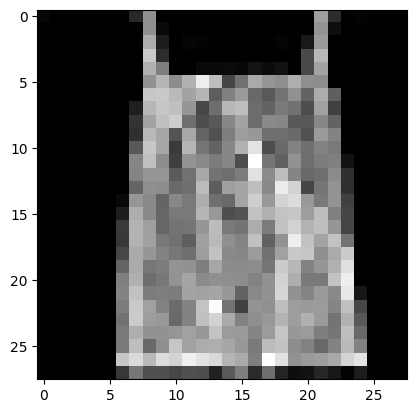

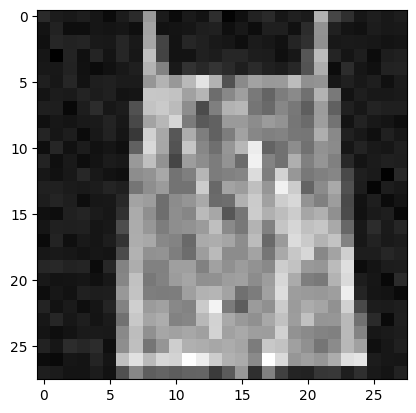

In [7]:
np.random.shuffle(img_database)
x_train = img_database
x_train_noisy = x_train + 10*np.random.normal(0,1,size=x_train.shape)
plt.imshow(x_train[0].reshape(28,28), cmap = "gray")
plt.show()

plt.imshow(x_train_noisy[0].reshape(28,28),cmap = "gray")
plt.show()

In [8]:
computed_loss = tf.reduce_mean(tf.square(NN_output-y))
optimizer = tf.compat.v1.train.AdagradOptimizer(learning_rate).minimize(computed_loss)
init = tf.compat.v1.global_variables_initializer()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 0 / 10 loss: 5657.9927
Epoch 1 / 10 loss: 4855.937
Epoch 2 / 10 loss: 4509.639
Epoch 3 / 10 loss: 4206.0107
Epoch 4 / 10 loss: 4141.6304
Epoch 5 / 10 loss: 4024.1396
Epoch 6 / 10 loss: 3950.9302
Epoch 7 / 10 loss: 3935.8826
Epoch 8 / 10 loss: 3955.2188
Epoch 9 / 10 loss: 3900.585


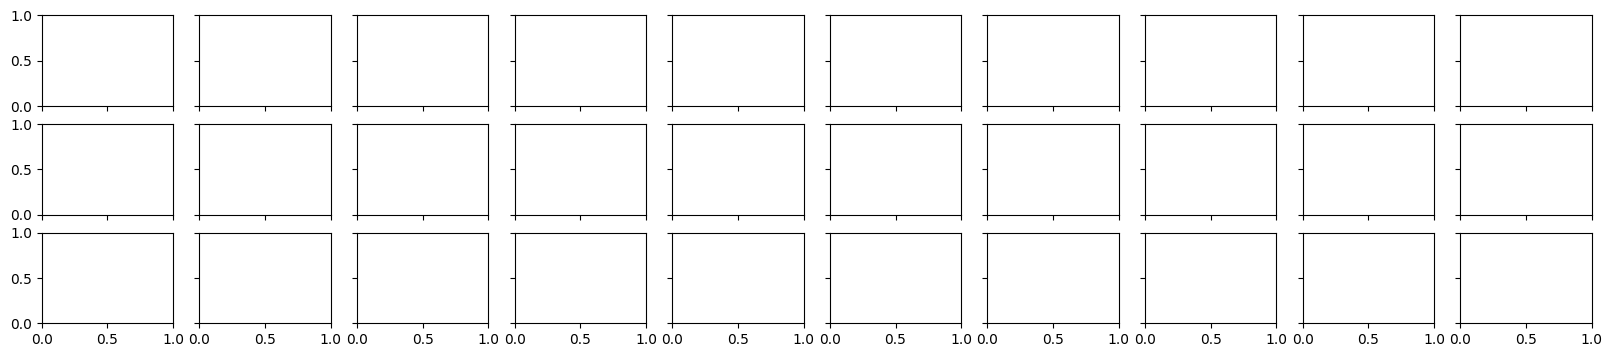

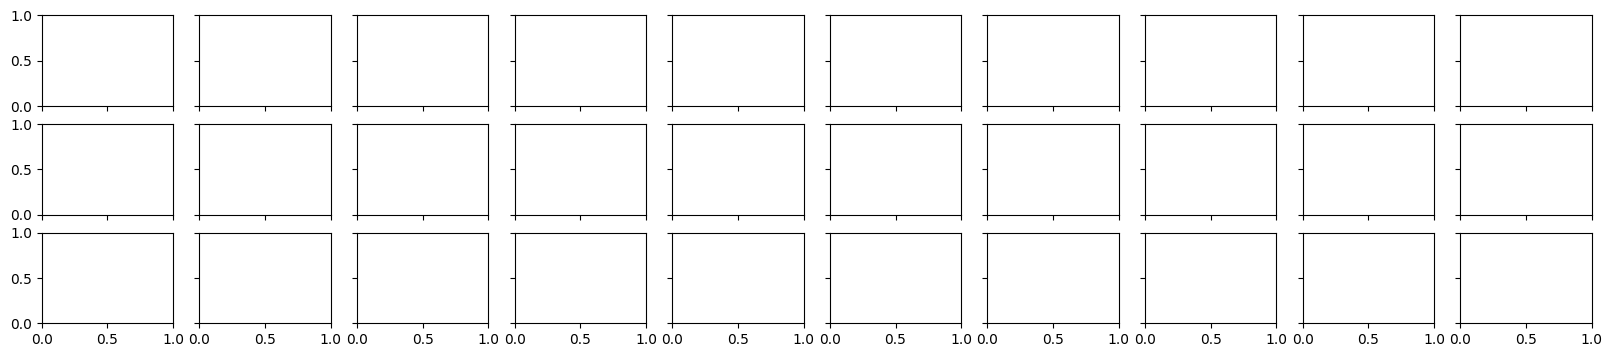

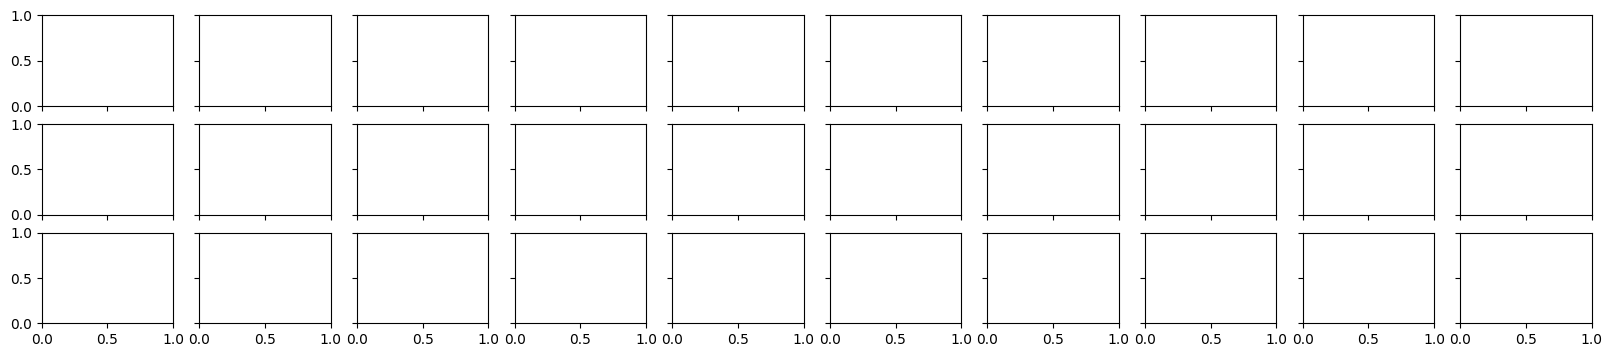

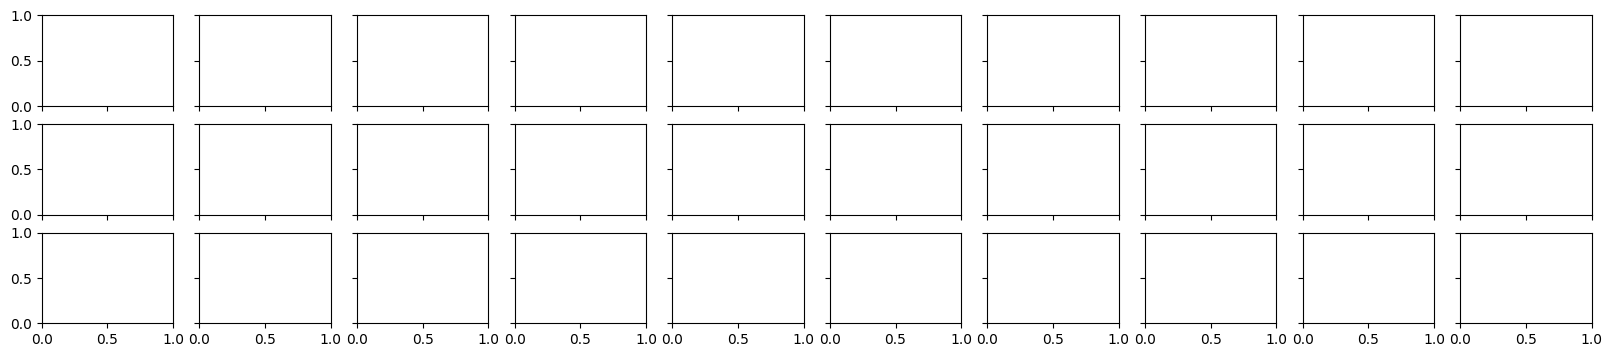

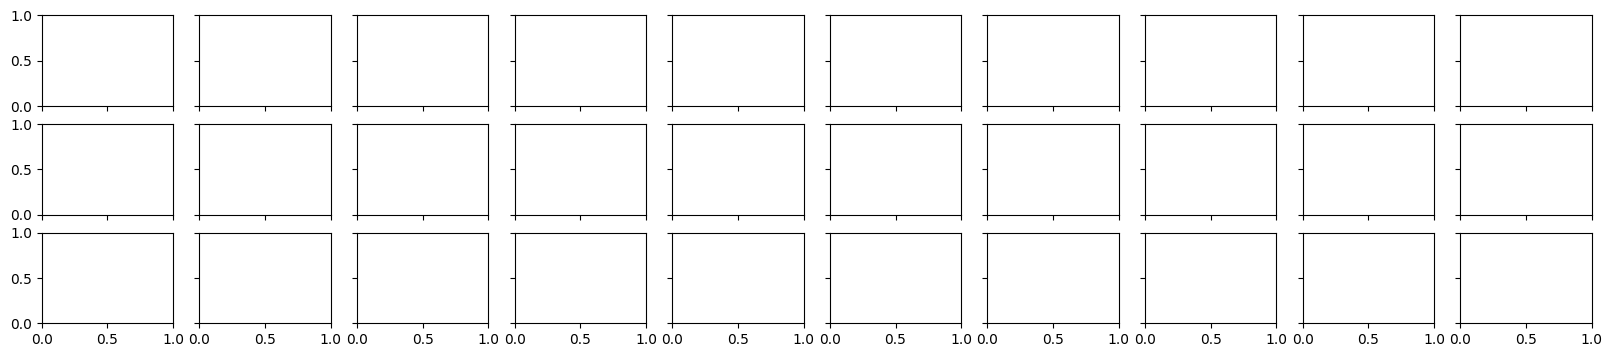

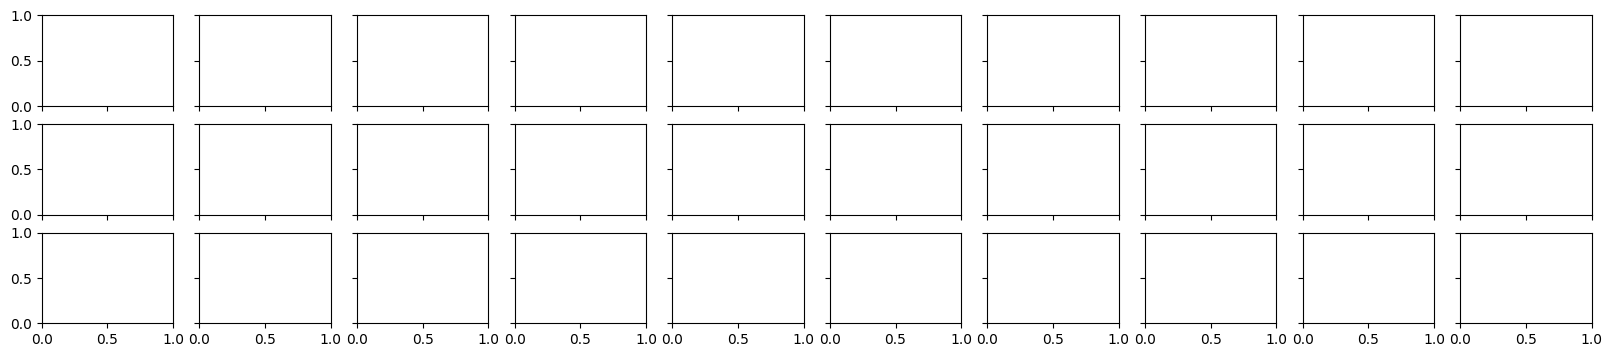

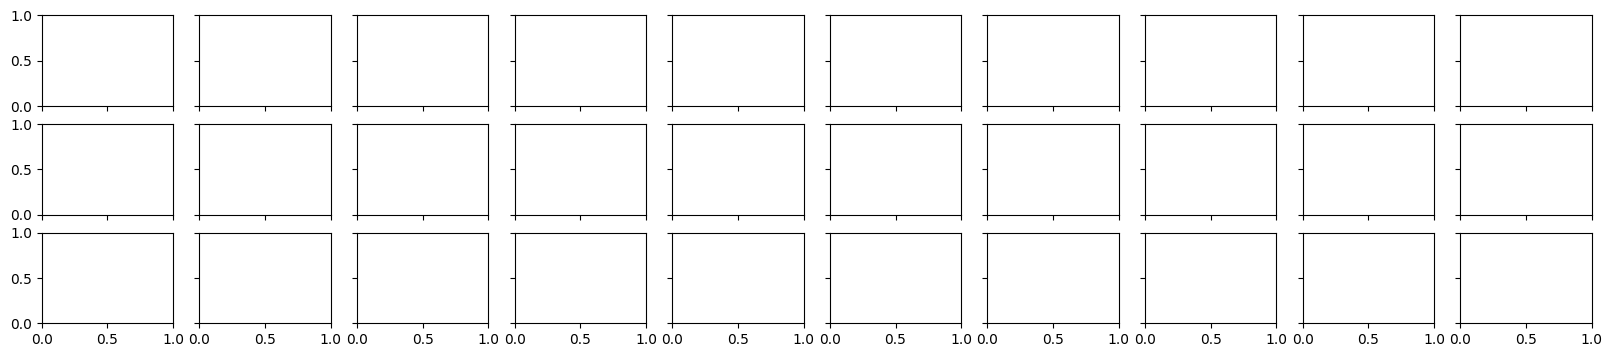

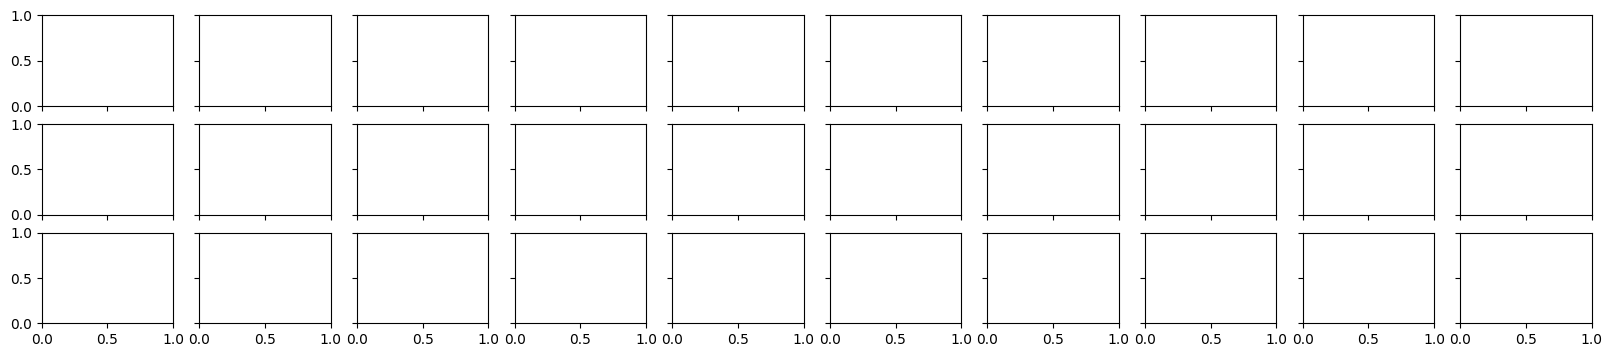

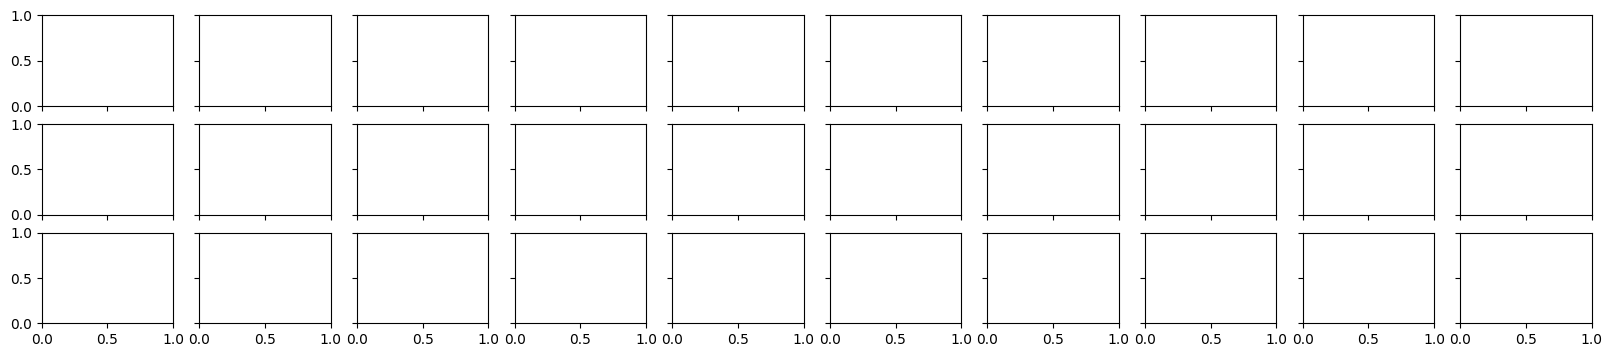

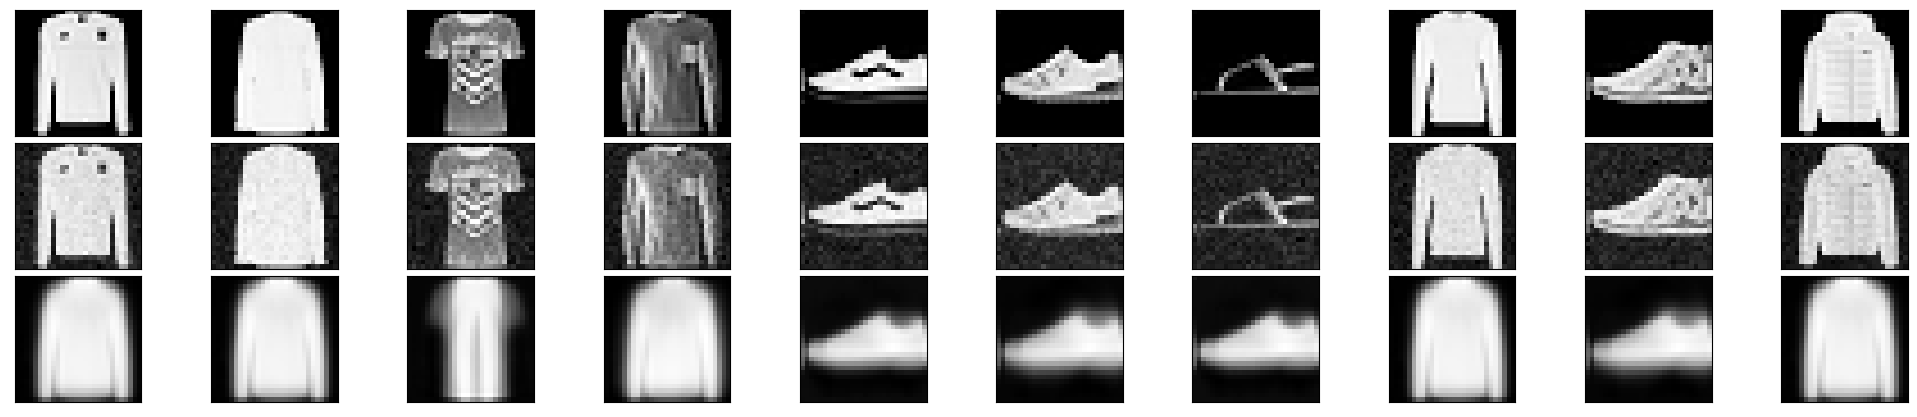

In [9]:
sess=tf.compat.v1.Session()
sess.run(init)
for epoch in range (epochs):
    for i in range (int(total_num_images/batch_size)):
        x_epoch = x_train[i*batch_size:(i+1)*batch_size]
        x_noise_epoch = x_train_noisy[i*batch_size:(i+1)*batch_size]
        _, loss = sess.run([optimizer,computed_loss],feed_dict = {x:x_noise_epoch,y:x_epoch})
    print("Epoch",epoch,'/',epochs,'loss:',loss)

    x_actual = x_train[20:30]
    noisy_image = x_train_noisy[20:30]


    denoised_images =sess.run(NN_output,feed_dict={x:noisy_image})

    fig, axes = plt.subplots(nrows=3,ncols=10,sharex=True,sharey=True,figsize =(20,4))
for images ,row in zip([x_actual,noisy_image,denoised_images],axes):
    for img ,ax in zip(images,row):
        ax.imshow(img.reshape((28,28)),cmap ="Greys_r")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
fig.tight_layout(pad =0.1)
